# Proyecto Parcial 1

**Objetivo:** Predecir la concentración de partículas PM2.5 en función de variables meteorológicas como temperatura, viento, precipitación y presión atmosférica en el municipio de San Pedro Garza García.

Los datos correspondientes a los niveles de contaminantes y a las variables meteorológicas del municipio de San Pedro Garza García se obtuvieron de diferentes fuentes:
- [Datos meteorológicos](https://meteostat.net/en/place/mx/san-pedro-garza-garcia?s=76393&t=2022-01-01/2022-12-31)
- [Datos de contaminación](https://sinaica.inecc.gob.mx/scica/)

A continuación se importarán cada uno de los archivos al ambiente de trabajo, se analizaran las variables para ver si están en el formato correcto y si no tienen inconsistencias de datos. Posteriormente se concatenaran los dataframes resultantes en uno solo para facilitar el análisis.

## Importación y limpieza de datos

1. Se importan los datos correspondientes a los niveles de PM2.5 del año 2022.

In [1]:
import pandas as pd

# Importar los datos del csv
df_PM2_5 = pd.read_csv("/content/drive/MyDrive/ITC/10mo Semestre/Inteligencia Artificial I/P Parcial 1/Datos SINAICA-PM2.5-P24H-2022.csv")

# Imprimir los 10 primeros registros
print(df_PM2_5.head(10))

# Imprimir la info del dataframe
df_PM2_5.info()

       Fecha PM2.5 (ug/m³)
0   1/1/2022            16
1   1/2/2022             8
2   1/3/2022             6
3   1/4/2022            19
4   1/5/2022            15
5   1/6/2022            16
6   1/7/2022            21
7   1/8/2022            38
8   1/9/2022            25
9  1/10/2022             8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Fecha          365 non-null    object
 1   PM2.5 (ug/m³)  365 non-null    object
dtypes: object(2)
memory usage: 5.8+ KB


- Se convierten los tipos de datos de las variables a los que deben de ser. (object, object) -> (date, float)

In [2]:
# Se convierten los datos a los tipos correspondientes
df_PM2_5["Fecha"] = pd.to_datetime(df_PM2_5["Fecha"], format="%m/%d/%Y", errors="coerce")
df_PM2_5["PM2.5 (ug/m³)"] = pd.to_numeric(df_PM2_5["PM2.5 (ug/m³)"], errors="coerce")

# Verificar el resultado
print(df_PM2_5.dtypes)
print(df_PM2_5.head())

Fecha            datetime64[ns]
PM2.5 (ug/m³)           float64
dtype: object
       Fecha  PM2.5 (ug/m³)
0 2022-01-01           16.0
1 2022-01-02            8.0
2 2022-01-03            6.0
3 2022-01-04           19.0
4 2022-01-05           15.0


- Se revisa la información del dataframe para revisar si no hay valores nulos despues de la conversión.

In [3]:
df_PM2_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          365 non-null    datetime64[ns]
 1   PM2.5 (ug/m³)  358 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


- Se llenan los valores nulos en PM2.5 por la media de los datos existentes.

In [4]:
# Llenar los valores nulos con la media de cada columna numérica
df_PM2_5.fillna(df_PM2_5.mean(), inplace=True)
df_PM2_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          365 non-null    datetime64[ns]
 1   PM2.5 (ug/m³)  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


2. Se importan los datos meteorológicos del año 2022.

In [5]:
# Importar los datos del csv
df_met = pd.read_csv("/content/drive/MyDrive/ITC/10mo Semestre/Inteligencia Artificial I/P Parcial 1/weather data MTY.csv")

# Imprimir los 10 primeros registros
print(df_met.head(10))

# Imprimir la info del dataframe
df_met.info()

         date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun
0  2022-01-01  25.1  15.6  35.2   0.0   NaN  288.0   8.7   NaN  1005.4   NaN
1  2022-01-02  14.1   5.2  22.1   0.0   NaN  358.0  20.7   NaN  1024.2   NaN
2  2022-01-03   8.1   1.7  16.4   0.0   NaN   80.0   7.6   NaN  1030.5   NaN
3  2022-01-04  11.8   3.3  22.0   0.0   NaN  158.0   5.9   NaN  1020.9   NaN
4  2022-01-05  17.1   6.2  30.0   0.0   NaN  270.0   6.9   NaN  1012.7   NaN
5  2022-01-06  18.6   9.1  30.0   0.0   NaN  339.0   6.6   NaN  1013.2   NaN
6  2022-01-07  13.3  11.2  15.2   0.4   NaN   61.0  10.8   NaN  1018.8   NaN
7  2022-01-08  16.3  10.7  23.0   0.0   NaN  200.0   6.9   NaN  1015.5   NaN
8  2022-01-09  18.9  11.8  28.2   0.0   NaN  334.0   9.0   NaN  1020.3   NaN
9  2022-01-10  12.9  10.8  17.1   0.0   NaN    2.0  16.3   NaN  1032.8   NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------

- Al ver el dataframe resultante se deben de hacer los siguientes cambios:
 - Convertir la variable fecha de object a date.
 - Eliminar todas las variables que no tienen datos.
   - snow
   - wpgt
   - tsun
 - Verificar los 2 registros nulos del dataframe, llenar cada una de las variables con la media correspondiente.

In [6]:
# Convertir la variable fecha de object a date
df_met["date"] = pd.to_datetime(df_met["date"], format="%Y-%m-%d", errors="coerce")

# Eliminar variables que no tienen datos
df_met = df_met.drop(["snow", "wpgt", "tsun"], axis=1)

# Llenar los valores nulos con la media de cada columna numérica
df_met.fillna(df_met.mean(), inplace=True)

# Verificar el resultado
print(df_met.dtypes)
print(df_met.head())
df_met.info()

date    datetime64[ns]
tavg           float64
tmin           float64
tmax           float64
prcp           float64
wdir           float64
wspd           float64
pres           float64
dtype: object
        date  tavg  tmin  tmax  prcp   wdir  wspd    pres
0 2022-01-01  25.1  15.6  35.2   0.0  288.0   8.7  1005.4
1 2022-01-02  14.1   5.2  22.1   0.0  358.0  20.7  1024.2
2 2022-01-03   8.1   1.7  16.4   0.0   80.0   7.6  1030.5
3 2022-01-04  11.8   3.3  22.0   0.0  158.0   5.9  1020.9
4 2022-01-05  17.1   6.2  30.0   0.0  270.0   6.9  1012.7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    365 non-null    datetime64[ns]
 1   tavg    365 non-null    float64       
 2   tmin    365 non-null    float64       
 3   tmax    365 non-null    float64       
 4   prcp    365 non-null    float64       
 5   wdir    365 non-null    float64      

3. Se hace un merge entre ambos dataframes para tener un solo dataframe resultante.

In [7]:
# Concatenar horizontalmente
df_concat = pd.concat([df_PM2_5, df_met], axis=1)

# Eliminar la columna date del dataframe resultante
df_concat = df_concat.drop(["date"], axis=1)

# Se imprime la info del dataframe resultante
df_concat.info()
df_concat.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          365 non-null    datetime64[ns]
 1   PM2.5 (ug/m³)  365 non-null    float64       
 2   tavg           365 non-null    float64       
 3   tmin           365 non-null    float64       
 4   tmax           365 non-null    float64       
 5   prcp           365 non-null    float64       
 6   wdir           365 non-null    float64       
 7   wspd           365 non-null    float64       
 8   pres           365 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 25.8 KB


,Fecha,PM2.5 (ug/m³),tavg,tmin,tmax,prcp,wdir,wspd,pres
0,2022-01-01,16.0,25.1,15.6,35.2,0.0,288.0,8.7,1005.4
1,2022-01-02,8.0,14.1,5.2,22.1,0.0,358.0,20.7,1024.2
2,2022-01-03,6.0,8.1,1.7,16.4,0.0,80.0,7.6,1030.5
3,2022-01-04,19.0,11.8,3.3,22.0,0.0,158.0,5.9,1020.9
4,2022-01-05,15.0,17.1,6.2,30.0,0.0,270.0,6.9,1012.7
5,2022-01-06,16.0,18.6,9.1,30.0,0.0,339.0,6.6,1013.2
6,2022-01-07,21.0,13.3,11.2,15.2,0.4,61.0,10.8,1018.8
7,2022-01-08,38.0,16.3,10.7,23.0,0.0,200.0,6.9,1015.5
8,2022-01-09,25.0,18.9,11.8,28.2,0.0,334.0,9.0,1020.3
9,2022-01-10,8.0,12.9,10.8,17.1,0.0,2.0,16.3,1032.8


## Preprocesamiento de datos

Aplica soluciones para al menos tres de los cinco problemas típicos que se describieron en la presentación C1.5. Demuestra las modificaciones que se le realizaron a la base de datos, imprimiendo en consola información relevante, y explica por qué se realizaron. Por ejemplo: para el caso de variables cualitativas, podrías imprimir la cantidad y los nombres de las variables antes de aplicar la solución, y la cantidad y los nombres de las variables después de aplicar la solución.

### Outliers

4. Se identifican valores atípicos para la variable “PM2.5”, utilizando el método de Tukey con k=3.



In [8]:
# Cuartil uno
Q1 = df_concat["PM2.5 (ug/m³)"].quantile(0.25)

# Cuartil tres
Q3 = df_concat["PM2.5 (ug/m³)"].quantile(0.75)

# Rango intercuartil
IQR = Q3 - Q1

# Limites
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Observaciones fuera de cualquiera de los límites
outliers = df_concat[(df_concat["PM2.5 (ug/m³)"] < lower_bound) | (df_concat["PM2.5 (ug/m³)"] > upper_bound)]

# Imprimir los valores atípicos
print(f"Rango normal de valores: ({lower_bound}, {upper_bound})")
print("Valores atípicos en PM2.5:")
print(outliers)

Rango normal de valores: (-15.0, 48.0)
Valores atípicos en PM2.5:
         Fecha  PM2.5 (ug/m³)  tavg  tmin  tmax  prcp   wdir  wspd    pres
23  2022-01-24           55.0   9.6   6.6  13.6   5.1  319.0   3.9  1014.7
335 2022-12-02           51.0  16.6  12.4  22.6   0.0  182.0   5.7  1019.8


- De los resultados, se puede observar que dos registros tienen valores atípicos arriba de lo normal (**48 ug/m<sup>3</sup>**), debido a que son registros con valores que pueden afectar el ajuste del modelo, considero que la mejor opción sería eliminarlos del dataframe.

In [9]:
# Eliminar outliers
df_concat = df_concat[(df_concat["PM2.5 (ug/m³)"] >= lower_bound) & (df_concat["PM2.5 (ug/m³)"] <= upper_bound)]

# Comprobar eliminación
outliers = df_concat[(df_concat["PM2.5 (ug/m³)"] < lower_bound) | (df_concat["PM2.5 (ug/m³)"] > upper_bound)]

print("Valores atípicos en PM2.5:")
print(outliers)

Valores atípicos en PM2.5:
Empty DataFrame
Columns: [Fecha, PM2.5 (ug/m³), tavg, tmin, tmax, prcp, wdir, wspd, pres]
Index: []


5. Se identifican valores atípicos para la variable “**prcp**”, utilizando el método de Tukey con k=3.

In [10]:
# Cuartil uno
Q1 = df_concat["prcp"].quantile(0.25)

# Cuartil tres
Q3 = df_concat["prcp"].quantile(0.75)

# Rango intercuartil
IQR = Q3 - Q1

# Limites
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Observaciones fuera de cualquiera de los límites
outliers = df_concat[(df_concat["prcp"] < lower_bound) | (df_concat["prcp"] > upper_bound)]

# Imprimir los valores atípicos
print(f"Rango normal de valores: ({lower_bound}, {upper_bound})")
print("Valores atípicos en prcp:")
print(outliers)

Rango normal de valores: (-0.8999999999999999, 1.2)
Valores atípicos en prcp:
         Fecha  PM2.5 (ug/m³)  tavg  tmin  tmax  prcp   wdir  wspd    pres
20  2022-01-21           28.0   5.2   1.8   9.7   3.6   30.0  12.5  1028.5
24  2022-01-25           16.0  14.4   7.9  24.2   1.3   68.0   7.5  1015.3
26  2022-01-27           18.0  12.8  11.9  14.4   3.0  119.0   7.3  1021.8
27  2022-01-28           14.0  10.5   7.9  12.9   6.2  352.0  10.4  1029.6
104 2022-04-15           27.0  26.0  21.8  33.5   2.7  128.0  14.1  1009.6
107 2022-04-18           19.0  26.7  23.4  30.6   2.0  114.0  12.1  1014.6
108 2022-04-19           11.0  24.7  20.8  31.5   4.2  121.0  23.8  1013.9
111 2022-04-22           24.0  25.9  20.6  33.2   1.6  121.0  23.3  1014.0
114 2022-04-25           22.0  24.6  19.6  29.4  18.5  118.0  11.5  1011.1
115 2022-04-26            7.0  21.3  18.2  25.0  11.6   27.0   9.7  1020.3
120 2022-05-01           19.0  26.0  21.8  32.4   1.6  122.0  20.9  1008.8
141 2022-05-22        

- En este caso, el método arrojó muchos valores atípicos en **prcp** (nivel de precipitación), sin embargo, esto no quiere decir que sean errores de medición que se deban de eliminar, ya que solo son los días que llovió en la ciudad y no representan la mayoría de los días del año, son solo unos cuantos. Por otro lado, los días que no llueve tienen cero en esta variable, y como si representa la mayoría de registros hace que el rango de valores normales sea pequeño y muy cercano a cero, por lo tanto no considera los días que si llueve.

- No se observan más valores atípicos en otras variables.

### Colinealidad

6. Se genera una matriz de correlaciones para encontrar potenciales problemas de colinealidad. Se genera un heatmap para visualizar de forma sencilla los resultados y se determina si es necesario eliminar una o múltiples variables.

Indices con mayor correlación: (2, 4)
Valor de correlación máxima: 0.9625453160037548


Text(0.5, 1.0, 'Heatmap de correlaciones')

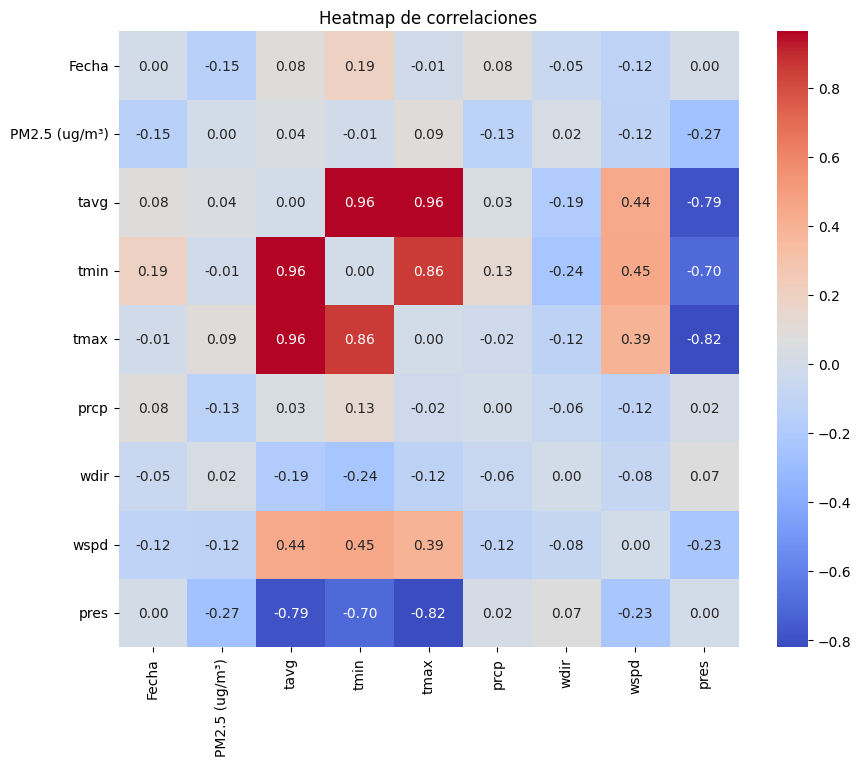

In [11]:
import numpy as np
from seaborn import heatmap
import matplotlib.pyplot as plt

# Obtener valor absoluto de matriz de correlación
df_corr = df_concat.corr()

# Llenar la diagonal con ceros
np.fill_diagonal(df_corr.values, 0)

# Obtener los índices (i, j) de la posicion del valor máximo
i,j = np.unravel_index(np.abs(df_corr.values).argmax(), df_corr.shape)

# Imprimir los índices y el valor de la correlación máxima
print(f"Indices con mayor correlación: ({i}, {j})")
print(f"Valor de correlación máxima: {df_corr.iloc[i,j]}")

%matplotlib inline

# Generar un heatmap para visualizar los resultados
plt.figure(figsize=(10,8))
heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap de correlaciones")

Observaciones:
- La mayor correlación se tiene entre las variables **tavg** con **tmax** y **tmin** (**0.96**).
- La segunda mayor correlación se tiene entre las variables **tmax** y **tmin** (**0.86**).
- Hay una fuerte correlación negativa entre la presión y las 3 variables de temperaturas (**tmax**, **tmin**, **tavg**) (**-0.79**).
- Se presenta una correlación positiva moderada (**0.45**) entre la velocidad del viento y las 3 variables de temperaturas.  

Las 2 primeras observaciones se deben a que las tres son mediciones de temperaturas del día, y es obvio que tendrán una alta correlación entre ellas. Por lo tanto, para evitar la redundancia será mejor dejar una sola, la más significativa (**tavg**), y eliminar las otras 2 redundantes (**tmax** y **tmin**).
En el caso de las otras correlaciones, como no se trata de variables similares y tampoco de correlaciones muy fuertes, se pueden quedar así.

- Se eliminan las variables **tmax** y **tmin** del dataframe.

In [12]:
# Se eliminan las variables
df_concat = df_concat.drop(["tmax", "tmin"], axis=1)

# Se comprueba la eliminación imprimiendo las variables existentes
print(df_concat.dtypes)

Fecha            datetime64[ns]
PM2.5 (ug/m³)           float64
tavg                    float64
prcp                    float64
wdir                    float64
wspd                    float64
pres                    float64
dtype: object


Al no mostrarse las variables **tmax** y **tmin** quiere decir que se eliminaron exitosamente del dataframe.

### Huecos

7. Anteriormente, en la fase de limpieza de datos se eliminaron del dataframe 9 registros que no tenían valores válidos en casi todos sus registros.

### Interacciones

8. De acuerdo a la matriz de correlaciones obtenida anteriormente, se pueden deducir las siguientes interacciones que podrían afectar los niveles de PM2.5:
 - **Temperatura promedio** con **Presión atmosferica** (-0.79): Esto puede decir que los días más calidos tienden a tener menor presión atmosférica, lo que podría afectar la dispersión de contaminantes. Se puede agregar la interacción **tavg x pres** para evaluar si influye en **PM2.5**.
 - **Temperatura promedio** con **Velocidad del viento** (0.44): Esto puede decir que los días con mayor temperatura suelen tener más viento, lo que podría influir en la dispersión de contaminantes. Se puede agregar la interacción **wspd x tavg** para evaluar el impacto en **PM2.5**.
 - **Precipitación** con **Presión atmosférica**: Existe una correlación baja negativa (-0.13) entre las variables de precipitación (prcp) y las partículas PM2.5, aunque sea baja también se sabe que los altos niveles de lluvia pueden reducir la contaminación, por lo tanto, se puede agregar la interacción **prcp x pres** para ver el impacto en **PM2.5**.

 A continuación, se agregan estas interacciones

In [13]:
# Crear variables de interacción en el DataFrame
df_concat["tavg_pres"] = df_concat["tavg"] * df_concat["pres"]
df_concat["tavg_wspd"] = df_concat["tavg"] * df_concat["wspd"]
df_concat["prcp_pres"] = df_concat["prcp"] * df_concat["pres"]

# Ver las nuevas variables creadas
print(df_concat.head())

       Fecha  PM2.5 (ug/m³)  tavg  prcp   wdir  wspd    pres  tavg_pres  \
0 2022-01-01           16.0  25.1   0.0  288.0   8.7  1005.4   25235.54   
1 2022-01-02            8.0  14.1   0.0  358.0  20.7  1024.2   14441.22   
2 2022-01-03            6.0   8.1   0.0   80.0   7.6  1030.5    8347.05   
3 2022-01-04           19.0  11.8   0.0  158.0   5.9  1020.9   12046.62   
4 2022-01-05           15.0  17.1   0.0  270.0   6.9  1012.7   17317.17   

   tavg_wspd  prcp_pres  
0     218.37        0.0  
1     291.87        0.0  
2      61.56        0.0  
3      69.62        0.0  
4     117.99        0.0  


### Selección de características

Realiza un proceso de selección de características. Puedes llevar a cabo una metodología de selección hacia adelante o eliminación hacia atrás, o incluso mezclarlas. También puedes utilizar un método de regularización. Evidencia tus resultados imprimiendo en consola la cantidad y los nombres de las variables antes y después del proceso de selección de características. Explica claramente por qué utilizaste la metodología empleada, así como alguna conclusión sobre los resultados de este proceso.

9. Se separa el DataFrame en datos de entrenamiento y de prueba con una proporción 70/30, asegurando que la partición sea aleatoria. Se imprime en pantalla las dimensiones de ambos conjuntos de datos, comprobando que la cantidad de observaciones de ambos conjuntos de datos sumen a la cantidad de datos original.

In [14]:
from sklearn.model_selection import train_test_split

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(df_concat.drop(["PM2.5 (ug/m³)", "Fecha"], axis=1), df_concat["PM2.5 (ug/m³)"], test_size=0.3, random_state=42)

# Imprimir tamaño de nuevos objetos
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de Y_train:", Y_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de Y_test:", Y_test.shape)

Tamaño de X_train: (254, 8)
Tamaño de Y_train: (254,)
Tamaño de X_test: (109, 8)
Tamaño de Y_test: (109,)


10. Debido a que se tiene un número moderado de variables, se emplea la metodología de selección hacia adelante para encontrar el subconjunto óptimo.

In [15]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Se declara el modelo y se hace la metodología de selección hacia adelante con la función SFS.
model = LinearRegression()
sfs_forward = SFS(model, k_features='best', forward=True, scoring='r2', cv=5)
sfs_forward.fit(X_train, Y_train)

# Se imprimen las características seleccionadas
selected_features = list(sfs_forward.k_feature_names_)
print("Características seleccionadas:", selected_features)

Características seleccionadas: ['tavg', 'prcp', 'wspd', 'pres', 'tavg_pres', 'tavg_wspd', 'prcp_pres']


11. Aplicar regularización con Lasso para optimizar un poco más la selección de variables.

In [16]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import RobustScaler

# Filtrar solo las variables seleccionadas por SFS
X_train_selected = X_train[selected_features]

# Se normalizan los datos
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)

# Aplicar Lasso con validación cruzada para encontrar el mejor alpha
lasso = LassoCV(cv=5, max_iter=5000, random_state=42).fit(X_train_scaled, Y_train)

# Seleccionar las características no eliminadas por Lasso
selected_features_lasso = X_train_selected.columns[lasso.coef_ != 0]

print("Características seleccionadas después de SFS + Lasso:", list(selected_features_lasso))

Características seleccionadas después de SFS + Lasso: ['prcp', 'wspd', 'pres', 'tavg_pres', 'tavg_wspd']


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1467614880384644, tolerance: 1.0210519027857072
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.433492582564213, tolerance: 1.0210519027857072
  model = cd_fast.enet_coordinate_descent_gram(


Debido a que se tenía un número moderado de variables, más no optimo (10 variables), y se piensa empezar a probar con un modelo simple, se decidió reducir el número las variables regresoras utilizando la metodología de selección hacia adelante. Al aplicarse se obtuvo una lista de 7 variables que serían las mas relevantes para la aplicación del modelo.

Posteriormente, con la finalidad de reducir el sobreajuste que se pueden dar con ciertas variables como **tavg** y **tavg_pres**, se decidió usar el método de regularización Lasso para optimizar un poco más la selección de variables sobre las ya seleccionadas. Al aplicarse se obtuvo una lista de solo 5 variables que vendrían siendo las más importantes para la aplicación del modelo.

## Aplicación de modelos

Genera un modelo de regresión lineal y al menos uno no lineal, para predecir una variable
de interés; explica con detalle por qué seguiste los pasos mostrados en tu código para
generar el modelo, en aras de obtener la mejor predicción y resultados generalizables.
Imprime en consola los coeficientes estimados al entrenar el modelo, e indica para cuáles
de ellos puedes afirmar que existe una asociación significativa con la respuesta, y el por
qué de tu aseveración.

### Regresión lineal

12. Se genera un modelo de regresión lineal para predecir el nivel de PM2.5 en base a las variables meteorológicas seleccionadas anteriormente.

In [40]:
import statsmodels.api as sm

X_train_selected = X_train[selected_features_lasso]

# Generar el modelo
linear_model = sm.OLS(Y_train, sm.add_constant(X_train_selected))

# Entrenar el modelo
results = linear_model.fit()

# Imprimir resultados del modelo
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          PM2.5 (ug/m³)   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     12.42
Date:                Thu, 20 Feb 2025   Prob (F-statistic):           9.13e-11
Time:                        09:12:05   Log-Likelihood:                -833.72
No. Observations:                 254   AIC:                             1679.
Df Residuals:                     248   BIC:                             1701.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        783.7255    111.214      7.047      0.0

13. Se genera la gráfica de comparación de valores predictivos y valores reales.

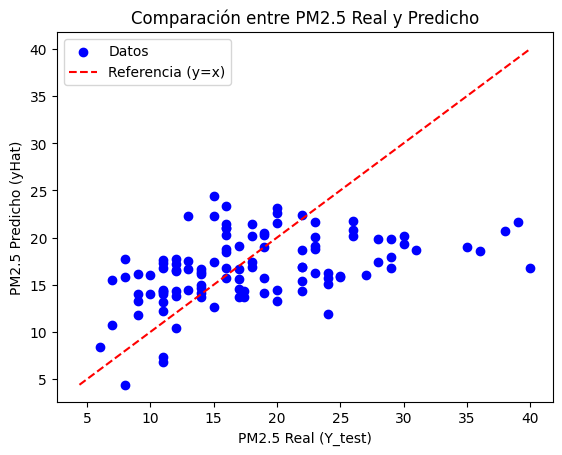

In [41]:
# Predecir peso de observaciones de prueba
yHatLineal = results.predict(sm.add_constant(X_test[selected_features_lasso]))

# Generar gráfica de dispersión
plt.scatter(Y_test, yHatLineal, label="Datos", color="blue")

# Agregar línea roja de referencia
min_val = min(min(Y_test), min(yHatLineal)) # Mínimo de ambos ejes
max_val = max(max(Y_test), max(yHatLineal)) # Máximo de ambos ejes
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Referencia (y=x)")

# Etiquetas y título
plt.xlabel("PM2.5 Real (Y_test)")
plt.ylabel("PM2.5 Predicho (yHat)")
plt.title("Comparación entre PM2.5 Real y Predicho")
plt.legend()

Con las características seleccionadas previamente, se generó un modelo de regresión líneal para predecir los valores de PM2.5. Posteriormente se graficó los valores reales de Y con los valores predichos por el modelo generado. De acuerdo a los resultados, se puede observar que el modelo lineal en realidad no tiene un buen ajuste, con una R<sup>2</sup> de apenas 0.2, el modelo solo explica el 20% del comportamiento de los datos. El valor del estadístico F no es alto (12.42), lo cual significa que el modelo no es muy significativo, sin embargo por lo menos una variable si es significativa. Los p-values de las variables meteorológicas se mantienen por debajo de 0.05 a excepción de una, el nivel de precipitación, la cual tiene un p-value de 0.08. Debido a que el modelo no parece tener un buen ajuste, la mejor opción será probar con otros.

### Regresión polinomial cuadrática

14. Se entrena un modelo de regresión polinomial cuadrática usando los datos de entrenamiento. Se imprime un resumen de los datos obtenidos y se emplea una gráfica para analizar las diferencias entre los datos reales y predichos.

In [42]:
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

# Generar polinomiales de grado 2 y ajustar los datos
polyq_train = PolynomialFeatures(degree=2).fit(X_train_selected)
polyq_test = PolynomialFeatures(degree=2).fit(X_test[selected_features_lasso])

# TransformR los datos para que incluyan el polinomial de segundo orden.
Xq_train = pd.DataFrame(polyq_train.transform(X_train_selected))
Xq_test = pd.DataFrame(polyq_test.transform(X_test[selected_features_lasso]))

# Generar y entrenar el modelo
mq = sm.OLS(list(Y_train), Xq_train).fit()

# Imprimir resultados
print(mq.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     4.218
Date:                Thu, 20 Feb 2025   Prob (F-statistic):           5.48e-08
Time:                        09:13:27   Log-Likelihood:                -824.69
No. Observations:                 254   AIC:                             1689.
Df Residuals:                     234   BIC:                             1760.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0          -6495.0301    2.5e+04     -0.260      0.7

15. Se genera la gráfica de comparación de valores predictivos y valores reales.

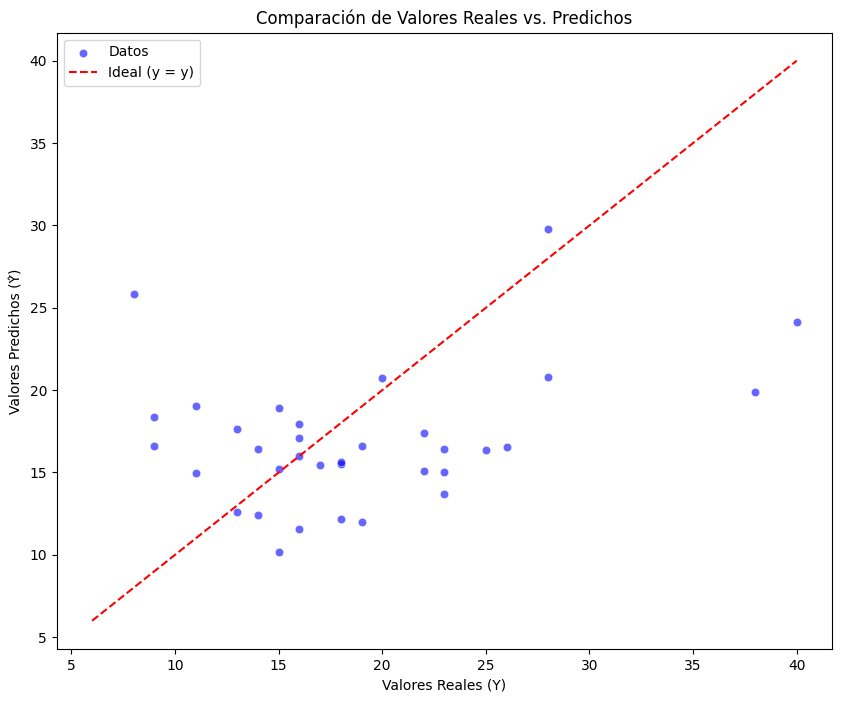

In [43]:
import seaborn as sns

# Predicción y evaluación del modelo
yHatQuad = mq.predict(Xq_test)

# Graficar valores realves vs predichos
plt.figure(figsize=(10, 8))
sns.scatterplot(x=Y_test, y=yHatQuad, color="blue", label="Datos", alpha=0.6)

# Dibujar la línea de referencia perfecta (y = x)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color="red", linestyle="--", label="Ideal (y = y)")

# Etiquetas y título
plt.xlabel("Valores Reales (Y)")
plt.ylabel("Valores Predichos (Ŷ)")
plt.title("Comparación de Valores Reales vs. Predichos")
plt.legend()


En este caso, el **modelo polinomial cuadrático** tampoco demuestra tener un buen ajuste, con una R<sup>2</sup> de 0.255, el modelo apenas explica el comportamiento del 25% de los datos, el estadístico F es igual de bajo y se tienen muchas variables generadas que no son significantes para el modelo (p-values superiores a 0.05), aparte de que aparentemente tienen problemas de colinealidad entre ellas. En la gráfica se puede observar una dispersión mayor de los valores, indicando las grandes diferencias entre valores reales y predichos y poniendo en evidencia la falta de precisión de este modelo.

### Arboles de decisión

16. Se trata de implementar un modelo de árbol de decisión para analizar el comportamiento.

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X_train_selected, Y_train)
yHatTree = tree.predict(X_test[selected_features_lasso])

print(f"R2 del árbol de decision (entrenamiento): {r2_score(Y_test, yHatTree):.4f}")

R2 del árbol de decision (entrenamiento): -0.2415


17. Se genera la gráfica para este modelo.

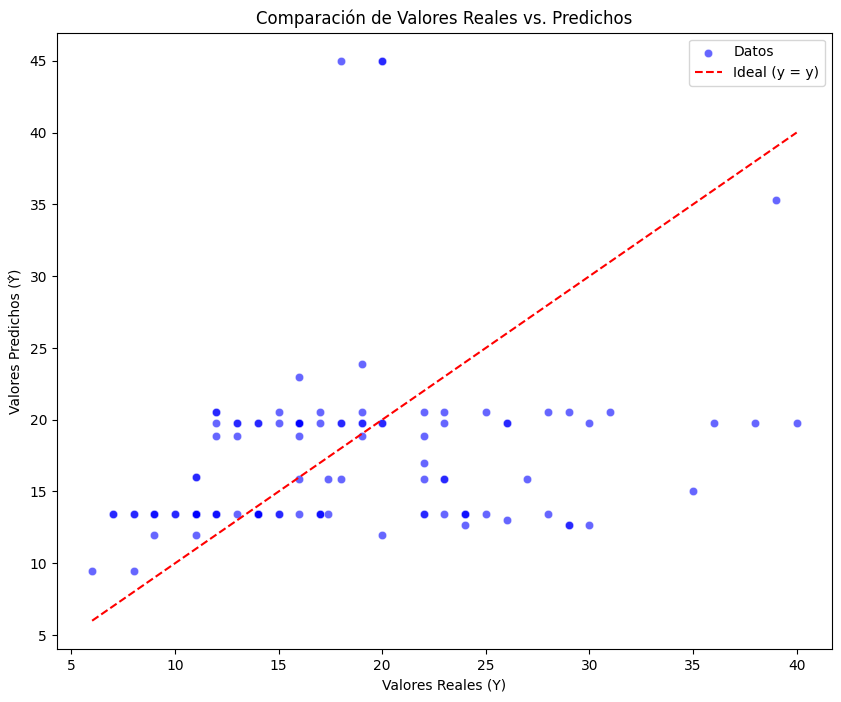

In [47]:
# Graficar valores realves vs predichos
plt.figure(figsize=(10, 8))
sns.scatterplot(x=Y_test, y=yHatTree, color="blue", label="Datos", alpha=0.6)

# Dibujar la línea de referencia perfecta (y = x)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color="red", linestyle="--", label="Ideal (y = y)")

# Etiquetas y título
plt.xlabel("Valores Reales (Y)")
plt.ylabel("Valores Predichos (Ŷ)")
plt.title("Comparación de Valores Reales vs. Predichos")
plt.legend()

La R<sup>2</sup> del modelo de árbol de decisión resulto ser negativa, lo cual índica que el modelo es malo y no explica el comportamiento de los datos en la variable dependiente (**PM2.5**) con respecto a las variables independientes seleccionadas anteriormente. En la gráfica se puede visualizar que los valores predichos de PM2.5 no se ajustan para nada a los valores reales y hay diferencias grandes.

### Regresión polinomial grado 5

18. Se entrena un modelo de regresión polinomial de grado 5.

In [49]:
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

# Generar polinomiales de grado 5 y ajustar los datos
polyq_train = PolynomialFeatures(degree=5).fit(X_train_selected)
polyq_test = PolynomialFeatures(degree=5).fit(X_test[selected_features_lasso])

# TransformR los datos para que incluyan el polinomial de segundo orden.
Xq_train = pd.DataFrame(polyq_train.transform(X_train_selected))
Xq_test = pd.DataFrame(polyq_test.transform(X_test[selected_features_lasso]))

# Generar y entrenar el modelo
m3 = sm.OLS(list(Y_train), Xq_train).fit()

# Imprimir resultados
print(m3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     3.541
Date:                Thu, 20 Feb 2025   Prob (F-statistic):           1.50e-10
Time:                        09:16:55   Log-Likelihood:                -783.94
No. Observations:                 254   AIC:                             1668.
Df Residuals:                     204   BIC:                             1845.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0           1.894e-11   1.33e-11      1.428      0.1

19. Se genera la gráfica para este modelo.

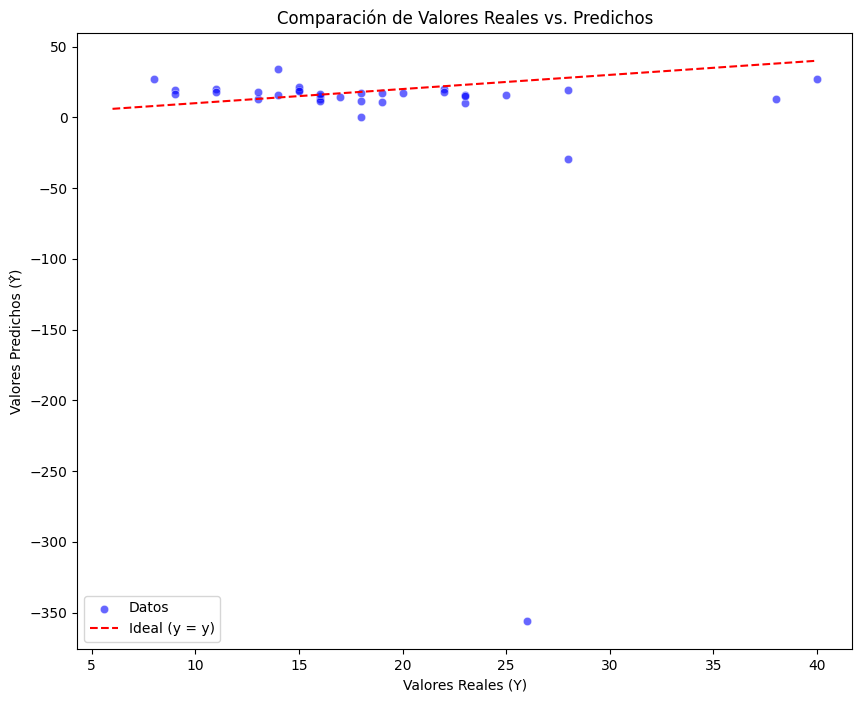

In [50]:
# Predicción y evaluación del modelo
yHatPent = m3.predict(Xq_test)

# Graficar valores realves vs predichos
plt.figure(figsize=(10, 8))
sns.scatterplot(x=Y_test, y=yHatPent, color="blue", label="Datos", alpha=0.6)

# Dibujar la línea de referencia perfecta (y = x)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color="red", linestyle="--", label="Ideal (y = y)")

# Etiquetas y título
plt.xlabel("Valores Reales (Y)")
plt.ylabel("Valores Predichos (Ŷ)")
plt.title("Comparación de Valores Reales vs. Predichos")
plt.legend()

De acuerdo con los resultados del modelo y la gráfica, el ajuste mejora un poco al tener una R2 de **0.460**, sin embargo, el ajuste sigue siendo bajo. Aún así y a pesar de la complejidad, este es el mejor modelo encontrado hasta ahora.

## Métricas de error

Calcula al menos una métrica de error y una del nivel de linealidad del modelo, con la
intención de que ambas métricas representen el funcionamiento esperado del modelo
para cualquier dato que se le presente. Agrega un comentario que describa en palabras
sencillas el significado de los mismos.

20. Se calcula el **MAE** y el **RMSE** para la regresión lineal.

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calcular métricas
mae_lineal = mean_absolute_error(Y_test, yHatLineal)  # Error Absoluto Medio
rmse_lineal = np.sqrt(mean_squared_error(Y_test, yHatLineal))  # Raíz del Error Cuadrático Medio

print(f"MAE: {mae_lineal:.4f}")
print(f"RMSE: {rmse_lineal:.4f}")

MAE: 5.2734
RMSE: 6.7407


21. Se calcula el **MAE** y el **RMSE** para la regresión polinomial cuadrática.

In [45]:
# Calcular métricas
mae_quad = mean_absolute_error(Y_test, yHatQuad)  # Error Absoluto Medio
rmse_quad = np.sqrt(mean_squared_error(Y_test, yHatQuad))  # Raíz del Error Cuadrático Medio

print(f"MAE: {mae_quad:.4f}")
print(f"RMSE: {rmse_quad:.4f}")

MAE: 5.3971
RMSE: 6.9989


22. Se calcula el **MAE** y el **RMSE** para el modelo de árbol de decisión.

In [48]:
# Calcular métricas
mae_tree = mean_absolute_error(Y_test, yHatTree)  # Error Absoluto Medio
rmse_tree = np.sqrt(mean_squared_error(Y_test, yHatTree))  # Raíz del Error Cuadrático Medio

print(f"MAE: {mae_tree:.4f}")
print(f"RMSE: {rmse_tree:.4f}")

MAE: 6.0225
RMSE: 8.2236


23. Se calcula el **MAE** y el **RMSE** para la regresión polinomial de grado 5.

In [52]:
# Calcular métricas
mae_pent = mean_absolute_error(Y_test, yHatPent)  # Error Absoluto Medio
rmse_pent = np.sqrt(mean_squared_error(Y_test, yHatPent))  # Raíz del Error Cuadrático Medio

print(f"MAE: {mae_pent:.4f}")
print(f"RMSE: {rmse_pent:.4f}")

MAE: 10.5598
RMSE: 36.7423


Se intentó calcular las métricas del error absoluto medio y la raíz del error cuadrático medio, estas miden qué tan lejos están las predicciones del modelo respecto a los valores reales. Entre más bajos estén, mas acertadas resultan ser las predicciones del modelo.
Después de calcular las métrica de error de todos los modelos intentados, se puede decir que el que tiene los valores más bajos es el de la regresión lineal, y para los otros modelos, estos van aumentando proporcionalmente a la complejidad del modelo. A pesar de esto, si se considera la R<sup>2</sup> como una medida de linealidad, de acuerdo a los valores obtenidos con anterioridad, la regresión polinomial de grado 5 es el que se ajustó mas, aunque los valores siguieron siendo bajos.

## Análisis de inferencia

Genera un modelo de regresión lineal o no lineal (del mismo tipo que el que haya obtenido
el mejor desempeño en los puntos anteriores), pero para realizar un análisis de inferencia.
A partir del mismo, realiza una o varias inferencias sobre los datos, asegurándote de
incluir márgenes de error para tus conclusiones.

24. Se hace un análisis de inferencia para un modelo de regresión lineal.

In [53]:
# Ajustar el modelo de regresión
X_train_const = sm.add_constant(X_train_selected)  # Agregar término constante (intercepto)
model = sm.OLS(Y_train, X_train_const).fit()

# Mostrar resultados del modelo
print(model.summary())

# Obtener intervalos de confianza del 95% para los coeficientes
print(model.conf_int(alpha=0.05))

                            OLS Regression Results                            
Dep. Variable:          PM2.5 (ug/m³)   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     12.42
Date:                Thu, 20 Feb 2025   Prob (F-statistic):           9.13e-11
Time:                        09:48:51   Log-Likelihood:                -833.72
No. Observations:                 254   AIC:                             1679.
Df Residuals:                     248   BIC:                             1701.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        783.7255    111.214      7.047      0.0

Se escogió analizar el modelo de regresión lineal ya que es el que salió con menor error y el segundo que tiene la R<sup>2</sup> más alta. El coeficiente sigue siendo bajo, lo cual con los datos que se tienen el modelo no logra explicar buena parte del comportamiento de los datos que se tienen. Sin embargo, los valores del estadístico F si sugieren que las variables meteorológicas tienen un impacto significativo en los niveles de PM2.5 pero no logran tener un buen ajuste. La mayoría de variables meteorológicas son significativas en el modelo ya que tienen un valor debajo del 0.05 a excepción del nivel de precipitación.  

- **Nombre:** José Humberto Cavazos
- **Matrícula:** 531712
- **Fecha:** 20/Feb/25